Lütfen aşağıdaki ödeve ilişkin çözümlerinizi Jupyter Notebook olarak GitHub hesabınıza yükleyin ve GitHub linkini aşağıdaki buton ile paylaşın. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Şimdi, ilk regresyon modelinizi tasarlama sırası sizde. Bu bölümde, Kaggle'ın "Ev Fiyatları" veri kümesini kullanacaksınız. Bu veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak. Verileri ve değişkenlerin açıklamalarını burada bulabilirsiniz: Ev Fiyatları

In [366]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [284]:
# df = house_prices_df
df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [331]:
print("---"*300)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Soru:1 Verileri inceleyin ve gerekli tüm verileri temizleyin.

## İlk İnceleme

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [286]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [287]:
df.shape

(1460, 81)

## Normalizasyon çalışması

Text(0, 0.5, 'Frequency')

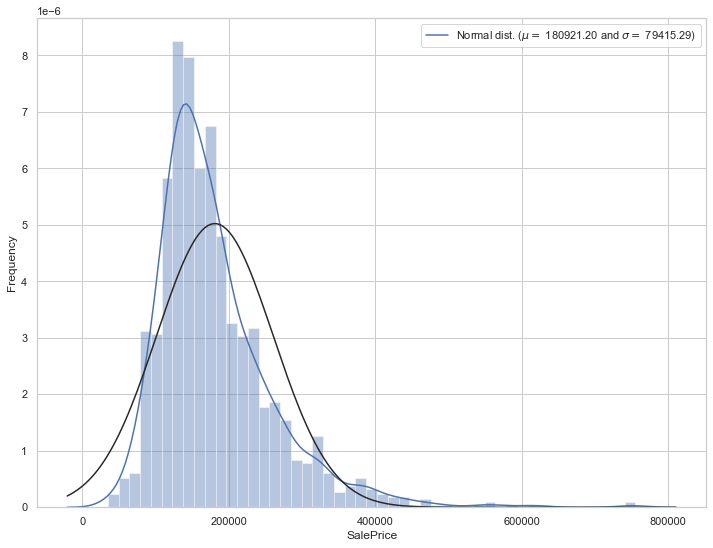

In [288]:
plt.subplots(figsize=(12,9))
sns.distplot(df["SalePrice"], fit=stats.norm)
(mu,sigma) = stats.norm.fit(df["SalePrice"])
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu, sigma)],loc="best")
plt.ylabel('Frequency')

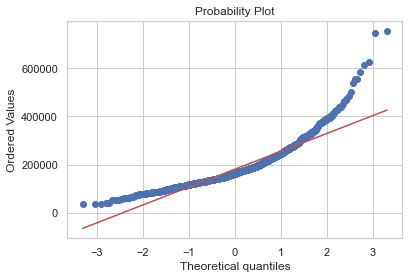

In [289]:
fig = plt.figure()
stats.probplot(df['SalePrice'], plot=plt)
plt.show()

"right skewed" olduğu gözükmektedir. Normalize etmeye çalışalım.

Log transformasyon deneyelim

In [290]:
df['SalePrice'] = np.log1p(df['SalePrice'])

Text(0, 0.5, 'Frequency')

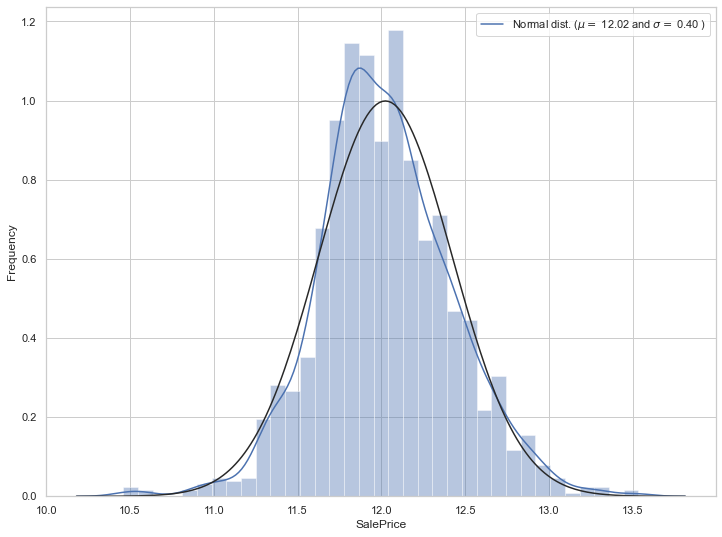

In [291]:
plt.subplots(figsize=(12,9))
sns.distplot(df['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(df['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

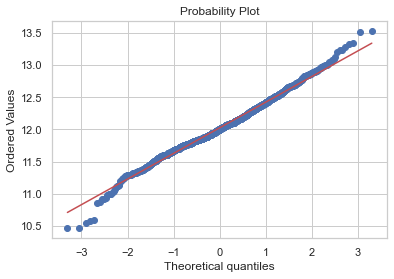

In [292]:
fig = plt.figure()
stats.probplot(df['SalePrice'], plot=plt)
plt.show()

## Eksik değer kontrolü

In [293]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

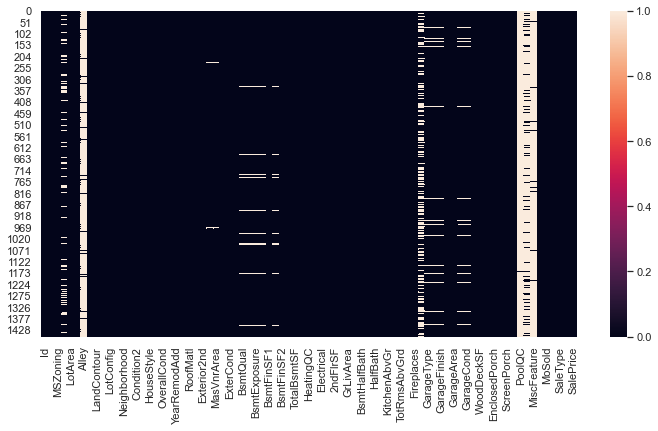

In [294]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

In [295]:
Isnull = df.isnull().sum()/len(df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [296]:
Isnull = Isnull.to_frame()

In [297]:
Isnull.columns = ['count']

In [298]:
Isnull.index.names = ['Name']

In [299]:
Isnull['Name'] = Isnull.index

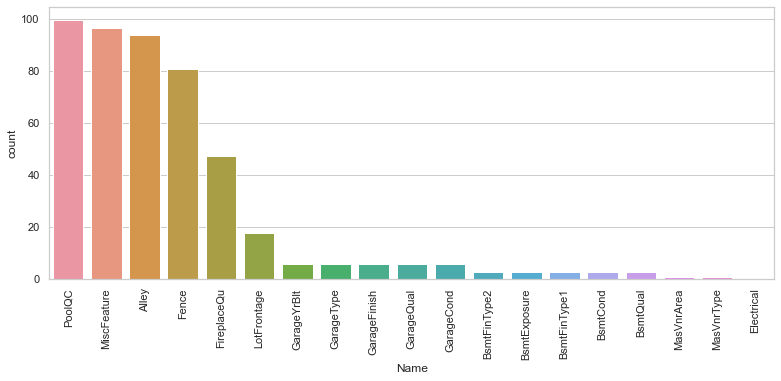

In [300]:
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

Eksik verileri büyükten küçüğe göre sıraladık.

In [301]:
corr = df.corr()

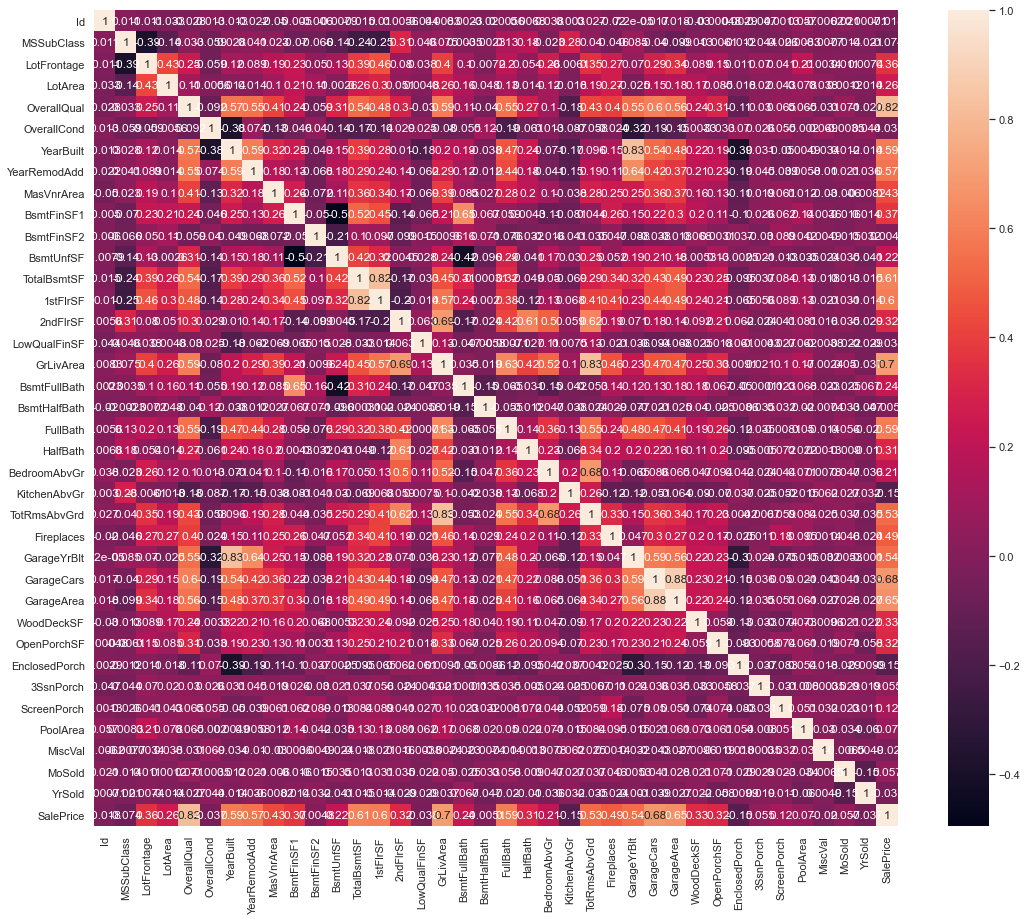

In [302]:
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True);

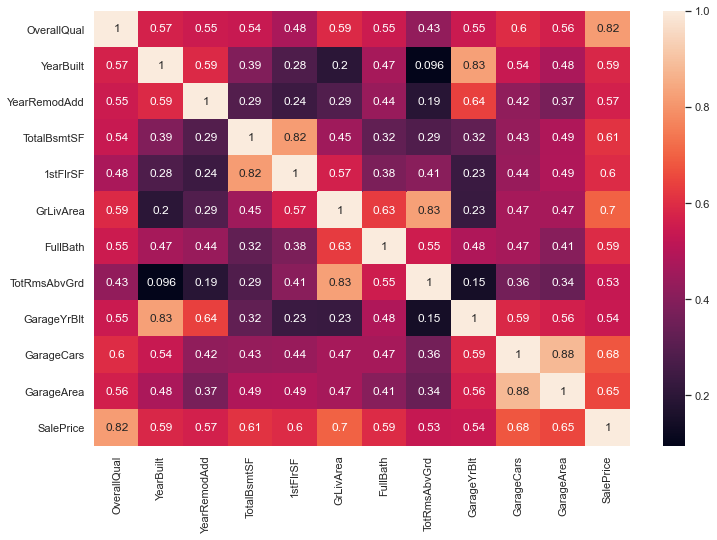

In [303]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [341]:
print("Ev satış fiyatı için en önemli değişkenler")
corr = df.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Ev satış fiyatı için en önemli değişkenler


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
LotFrontage      0.353288
GarageYrBlt      0.349013
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

En önemli özellikler neler, bunlarıda öğrendiğimize göre, önem sırasını dikkate alarak eksik değerleri doldurabiliriz.

### Eksik Değişkenleri Dolduralım

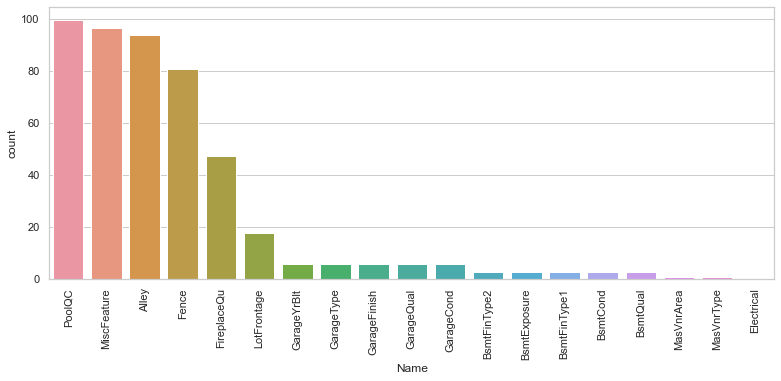

In [305]:
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

### PoolQC, %99 eksikti, fillna "None" yapıldı

In [306]:
print("Öncesi: " + str(df['PoolQC'].isnull().sum()*100/df.shape[0]))
df['PoolQC'] = df['PoolQC'].fillna('None')
print("Sonrası: " + str(df['PoolQC'].isnull().sum()*100/df.shape[0]))

Öncesi: 99.52054794520548
Sonrası: 0.0


### MiscFeature, fillna "None"

In [307]:
print("Öncesi: " + str(df['MiscFeature'].isnull().sum()*100/df.shape[0]))
df['MiscFeature'] = df['MiscFeature'].fillna('None')
print("Sonrası: " + str(df['MiscFeature'].isnull().sum()*100/df.shape[0]))

Öncesi: 96.3013698630137
Sonrası: 0.0


### Alley, fillna "None"

In [308]:
print("Öncesi: " + str(df['Alley'].isnull().sum()*100/df.shape[0]))
df['Alley'] = df['Alley'].fillna('None')
print("Sonrası: " + str(df['Alley'].isnull().sum()*100/df.shape[0]))

Öncesi: 93.76712328767124
Sonrası: 0.0


### Fence, fillna "None"

In [309]:
print("Öncesi: " + str(df['Fence'].isnull().sum()*100/df.shape[0]))
df['Fence'] = df['Fence'].fillna('None')
print("Sonrası: " + str(df['Fence'].isnull().sum()*100/df.shape[0]))

Öncesi: 80.75342465753425
Sonrası: 0.0


### FireplaceQu, fillna "None"

In [310]:
print("Öncesi: " + str(df['FireplaceQu'].isnull().sum()*100/df.shape[0]))
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
print("Sonrası: " + str(df['FireplaceQu'].isnull().sum()*100/df.shape[0]))

Öncesi: 47.26027397260274
Sonrası: 0.0


### LotFrontage, Mahalleye göre median alınıp fillna yapılıyor

In [311]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [312]:
print("Öncesi: " + str(df['LotFrontage'].isnull().sum()*100/df.shape[0]))
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
print("Sonrası: " + str(df['LotFrontage'].isnull().sum()*100/df.shape[0]))

Öncesi: 17.73972602739726
Sonrası: 0.0


### GarageType, GarageFinish, GarageQual ve GarageCond için fillna "None"

In [323]:
for col in ['GarageType','GarageFinish','GarageQual',"GarageCond"]:
    print("Öncesi: " + str(df[col].isnull().sum()*100/df.shape[0]))
    df[col] = df[col].fillna(int(0))
    print("Sonrası: " + str(df[col].isnull().sum()*100/df.shape[0]))
    print("---"*20)

Öncesi: 5.5479452054794525
Sonrası: 0.0
------------------------------------------------------------
Öncesi: 5.5479452054794525
Sonrası: 0.0
------------------------------------------------------------
Öncesi: 5.5479452054794525
Sonrası: 0.0
------------------------------------------------------------
Öncesi: 5.5479452054794525
Sonrası: 0.0
------------------------------------------------------------


### GarageYrBlt, GarageArea ve GarageCars için boş değerleri 0 ile dolduruyoruz

In [326]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    print("Öncesi: " + str(df[col].isnull().sum()*100/df.shape[0]))
    df[col] = df[col].fillna(int(0))
    print("Sonrası: " + str(df[col].isnull().sum()*100/df.shape[0]))
    print("---"*20)

Öncesi: 5.5479452054794525
Sonrası: 0.0
------------------------------------------------------------
Öncesi: 0.0
Sonrası: 0.0
------------------------------------------------------------
Öncesi: 0.0
Sonrası: 0.0
------------------------------------------------------------


### BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual değişkenleride fillna None yapılıyor

In [314]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df[col] = df[col].fillna('None')

### MasVnrArea, 0 ile fillna yapılıyor

In [315]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(int(0))

### MasVnrType, 0 ile fillna yapılıyor

In [ ]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

### Electrical için Mode alarak fillna yapılıyor

In [317]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [318]:
print("Öncesi: " + str(df['Electrical'].isnull().sum()*100/df.shape[0]))
df['Electrical'] = df['Electrical'].fillna(df['Electrical']).mode()[0]
print("Sonrası: " + str(df['Electrical'].isnull().sum()*100/df.shape[0]))

Öncesi: 0.0684931506849315
Sonrası: 0.0


### Utilities, 0'a yakın  olduğu için gerek duyulmuyor

In [319]:
print("Öncesi: " + str(df['Utilities'].isnull().sum()*100/df.shape[0]))

Öncesi: 0.0


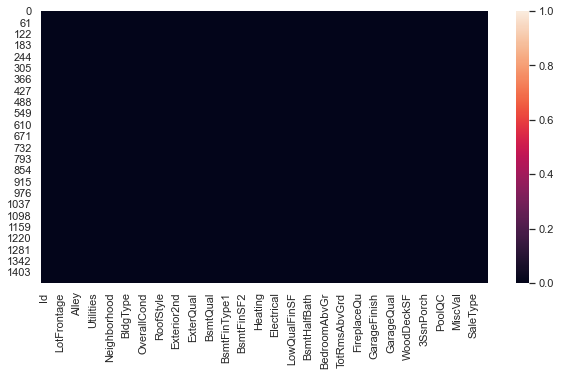

In [327]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull());

### Artık hiç bir eksik değer Yok.

In [332]:
print("---"*300)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Soru:2 Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.

Hedef Değişkenimizi, "SalePrice" inceleyelim.

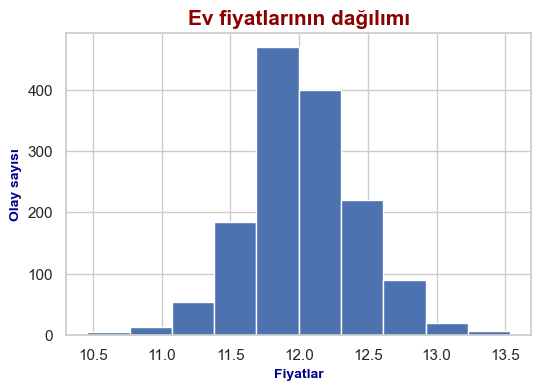

In [333]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(df.SalePrice)
plt.title("Ev fiyatlarının dağılımı", fontdict = baslik_font)
plt.xlabel("Fiyatlar", fontdict=eksen_font)
plt.ylabel("Olay sayısı", fontdict=eksen_font)
plt.show()

In [334]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109016


In [345]:
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [351]:
df.GrLivArea.mean()

1515.463698630137

In [347]:
df.GarageCars.unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [352]:
df.GarageArea.mean()

472.9801369863014

In [353]:
df.TotalBsmtSF.mean()

1057.4294520547944

In [355]:
print("Ev satış fiyatı için en önemli 5 değişken")
corr = df.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice.head(6)

Ev satış fiyatı için en önemli 5 değişken


SalePrice      1.000000
OverallQual    0.817185
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
TotalBsmtSF    0.612134
Name: SalePrice, dtype: float64

Korelasyon matrixde en çok etkisi olan en büyük 5 değeri Lineer Regresyonda kullanabiliriz.

# Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

In [359]:
lineer_model = LinearRegression()

## Sadece OverallQual değişkeni ile Regressyon

Yöntem 1

In [369]:
Y1 = df["SalePrice"]
X1 = df[["OverallQual"]]

In [374]:
lrm1 = linear_model.LinearRegression()
lrm1.fit(X1, Y1)

LinearRegression()

In [375]:
print('Değişkenler: \n', lrm1.coef_)
print('Sabit değer (bias): \n', lrm1.intercept_)

Değişkenler: 
 [0.23602648]
Sabit değer (bias): 
 10.584457556906923


Beta 0 (Intercept) ve Beta1(coef) katsayıları bulunmuştur.

Yöntem 2

In [400]:
satis_fiyat_1 = np.array(df["SalePrice"]).reshape(-1,1) #Y1
degisken_OverallQual = np.array(df["OverallQual"]).reshape(-1,1) #X1

In [401]:
lineer_model.fit(X=degisken_OverallQual, y=satis_fiyat_1)

LinearRegression()

In [402]:
lineer_model.intercept_

array([10.58445756])

In [403]:
lineer_model.coef_[0]

array([0.23602648])

In [404]:
lineer_model.score(X=degisken_OverallQual,y=satis_fiyat_1)

0.667790694153885

Verileri %66 oranında açıklamaktadır.

%66 değerini (R2) statsmodel ile aşağıdaki şekilde de görebiliriz

# %66

In [382]:
#import statsmodels.api as sm
X1 = sm.add_constant(X1)
results = sm.OLS(Y1, X1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2931.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        03:08:38   Log-Likelihood:                 73.099
No. Observations:                1460   AIC:                            -142.2
Df Residuals:                    1458   BIC:                            -131.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5845      0.027    388.186      0.000      10.531      10.638
OverallQual     0.2360      0.004     54.137      0.000       0.227       0.245
==============================================================================
Omnibus:                       87.970   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.047
Skew:                          -0.425   Prob(JB):                     1.45e-36
Kurtosis:                       4.410   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ev fiyatını tahmin edelim

In [406]:
satis_fiyat_tahmin_1 = lineer_model.predict(degisken_OverallQual)
satis_fiyat_tahmin_1

array([[12.23664288],
       [12.00061641],
       [12.23664288],
       ...,
       [12.23664288],
       [11.76458993],
       [11.76458993]])

Text(0, 0.5, 'Satış Rakamları')

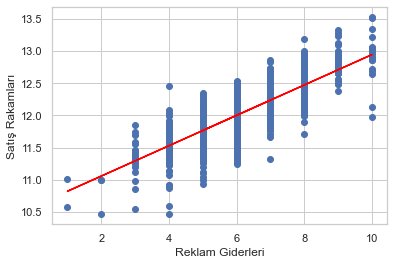

In [409]:
plt.scatter(x=degisken_OverallQual, y=satis_fiyat_1)
plt.plot(degisken_OverallQual, degisken_OverallQual*lineer_model.coef_[0] + lineer_model.intercept_, color="red")
plt.xlabel("Reklam Giderleri")
plt.ylabel("Satış Rakamları")

## OverallQual + GrLivArea değişkenleri ile Regresyon

In [414]:
Y2 = df["SalePrice"]
X2 = df[["OverallQual","GrLivArea"]]

In [420]:
lrm2 = linear_model.LinearRegression()
lrm2.fit(X2, Y2)

LinearRegression()

In [421]:
X2 = sm.add_constant(X2)
results = sm.OLS(Y2, X2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     2073.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        03:44:30   Log-Likelihood:                 251.93
No. Observations:                1460   AIC:                            -497.9
Df Residuals:                    1457   BIC:                            -482.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5486      0.024    435.951      0.000      10.501      10.596
OverallQual     0.1789      0.005     37.328      0.000       0.169       0.188
GrLivArea       0.0003   1.26e-05     20.111      0.000       0.000       0.000
==============================================================================
Omnibus:                      480.159   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3360.528
Skew:                          -1.348   Prob(JB):                         0.00
Kurtosis:                       9.926   Cond. No.                     7.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Verileri %74 oranında açıklamaktadır.

# %74

## OverallQual + GrLivArea + GarageCars değişkenleri ile Regresyon

In [419]:
Y3 = df["SalePrice"]
X3 = df[["OverallQual","GrLivArea","GarageCars"]]

In [422]:
lrm3 = linear_model.LinearRegression()
lrm3.fit(X3, Y3)

LinearRegression()

In [423]:
X3 = sm.add_constant(X3)
results = sm.OLS(Y3, X3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1697.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        03:45:06   Log-Likelihood:                 365.97
No. Observations:                1460   AIC:                            -723.9
Df Residuals:                    1456   BIC:                            -702.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5812      0.022    470.644      0.000      10.537      10.625
OverallQual     0.1434      0.005     28.806      0.000       0.134       0.153
GrLivArea       0.0002   1.18e-05     18.705      0.000       0.000       0.000
GarageCars      0.1316      0.008     15.690      0.000       0.115       0.148
==============================================================================
Omnibus:                      432.878   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2744.351
Skew:                          -1.225   Prob(JB):                         0.00
Kurtosis:                       9.254   Cond. No.                     7.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# %77